In [2]:
from src.eval import evaluate_rbm
from src.data_preprocessing import load_data, preprocess_data, load_movies
from src.rbm_model import RBM
from src.training import train_rbm
from src.plot_utils import plot_training_loss
from sklearn.model_selection import train_test_split
from src.utils import recommend, movie_from_tensor
import torch
import pandas as pd

Reconstruction Loss: 0.3914


Reconstruction Loss: 0.3091


Reconstruction Loss: 0.2792


Reconstruction Loss: 0.2615


Reconstruction Loss: 0.2486


Reconstruction Loss: 0.2376


Reconstruction Loss: 0.2292


Reconstruction Loss: 0.2218


Reconstruction Loss: 0.2156


Reconstruction Loss: 0.2089


Reconstruction Loss: 0.2036


Reconstruction Loss: 0.1993


Reconstruction Loss: 0.1938


Reconstruction Loss: 0.1890


Reconstruction Loss: 0.1842


Reconstruction Loss: 0.1799


Reconstruction Loss: 0.1747


Reconstruction Loss: 0.1710


Reconstruction Loss: 0.1660


Reconstruction Loss: 0.1625


Reconstruction Loss: 0.1601


Reconstruction Loss: 0.1563


Reconstruction Loss: 0.1519


Reconstruction Loss: 0.1491


Reconstruction Loss: 0.1457


Reconstruction Loss: 0.1442


Reconstruction Loss: 0.1408


Reconstruction Loss: 0.1390


Reconstruction Loss: 0.1366


Reconstruction Loss: 0.1341


Reconstruction Loss: 0.1327


Reconstruction Loss: 0.1287


Reconstruction Loss: 0.1292


Reconstruction Loss: 0.1267


Reconstruction Loss: 0.1237


Reconstruction Loss: 0.1226


Reconstruction Loss: 0.1216


Reconstruction Loss: 0.1189


Reconstruction Loss: 0.1181


Reconstruction Loss: 0.1159


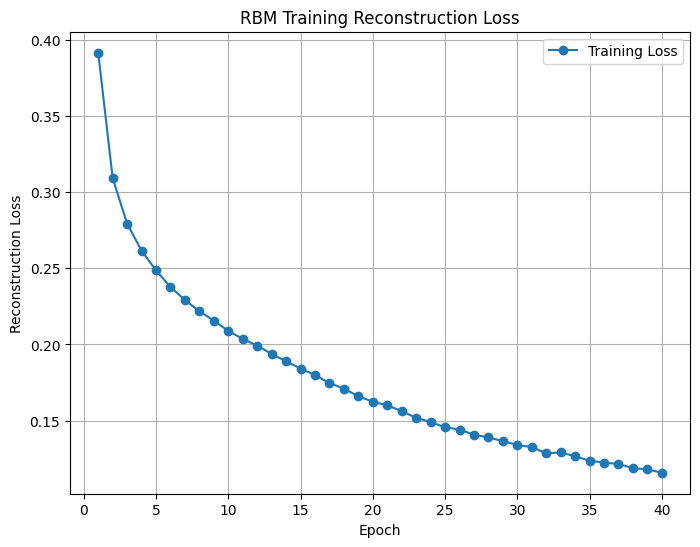

Validation loss: 0.08047235151999212
Validation accuracy: 91.95276472327602%


In [3]:
file_path = "data\\ml-100k\\u.data"
data = load_data(file_path)
interaction_matrix = preprocess_data(data)


interaction_tensor = torch.tensor(interaction_matrix.values, dtype=torch.float32)
train_data, test_data = train_test_split(interaction_tensor.numpy(), test_size=0.2, random_state=42)

train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_visible = interaction_tensor.shape[1]
num_hidden = 200
rbm = RBM(num_visible=num_visible, num_hidden=num_hidden, device=device)

losses = train_rbm(rbm, train_data, epochs=40, learning_rate=0.01, k=40, batch_size=32)

plot_training_loss(losses, title="RBM Training Reconstruction Loss", xlabel="Epoch", ylabel="Reconstruction Loss")
loss, acc = evaluate_rbm(rbm, test_data, device)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {acc*100}%")

In [4]:
movies = load_movies("data\\ml-100k\\u.item")

In [15]:
watched = test_data[50]
_,h = rbm.forward(watched)
probs, v = rbm.backward(h)


In [16]:
movie_from_tensor(watched, movies)

'Kolya (1996)' has the following genre:
['Comedy']
--------------------------------------------------
'Devil's Own, The (1997)' has the following genre:
['Action', 'Drama', 'Thriller', 'War']
--------------------------------------------------
'Event Horizon (1997)' has the following genre:
['Action', 'Mystery', 'Sci-Fi', 'Thriller']
--------------------------------------------------
'Full Monty, The (1997)' has the following genre:
['Comedy']
--------------------------------------------------
'English Patient, The (1996)' has the following genre:
['Drama', 'Romance', 'War']
--------------------------------------------------
'Evita (1996)' has the following genre:
['Drama', 'Musical']
--------------------------------------------------
'Air Force One (1997)' has the following genre:
['Action', 'Thriller']
--------------------------------------------------
'Ulee's Gold (1997)' has the following genre:
['Drama']
--------------------------------------------------
'Fly Away Home (1996)' has 

In [21]:
to_recommend = recommend(watched, probs, 3)
movie_from_tensor(to_recommend.cpu(), movies)

'Contact (1997)' has the following genre:
['Drama', 'Sci-Fi']
--------------------------------------------------
'Liar Liar (1997)' has the following genre:
['Comedy']
--------------------------------------------------
'Titanic (1997)' has the following genre:
['Action', 'Drama', 'Romance']
--------------------------------------------------
